In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree,export_text
from sklearn.metrics import mean_squared_error,confusion_matrix,accuracy_score,classification_report
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'D:\GIT\Workshop Machine Learning\Datasets\BreastCancer.csv')
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [7]:
data['Classification'].value_counts()

2    64
1    52
Name: Classification, dtype: int64

In [3]:
X=data.iloc[:,:9].values
y=data.iloc[:,9].values

In [4]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [5]:
clt = DecisionTreeClassifier()
clt.fit(x_train,y_train)

DecisionTreeClassifier()

In [6]:
print(export_text(clt))

|--- feature_2 <= 96.50
|   |--- feature_7 <= 10.64
|   |   |--- feature_3 <= 11.63
|   |   |   |--- feature_7 <= 3.28
|   |   |   |   |--- class: 2
|   |   |   |--- feature_7 >  3.28
|   |   |   |   |--- feature_5 <= 8.75
|   |   |   |   |   |--- feature_0 <= 66.00
|   |   |   |   |   |   |--- feature_4 <= 0.76
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_4 >  0.76
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_0 >  66.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  8.75
|   |   |   |   |   |--- feature_1 <= 32.58
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  32.58
|   |   |   |   |   |   |--- feature_5 <= 19.95
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- feature_5 >  19.95
|   |   |   |   |   |   |   |--- class: 1
|   |   |--- feature_3 >  11.63
|   |   |   |--- feature_5 <= 34.53
|   |   |   |   |--- class: 2
|   |   |   |--- feature_5 >  

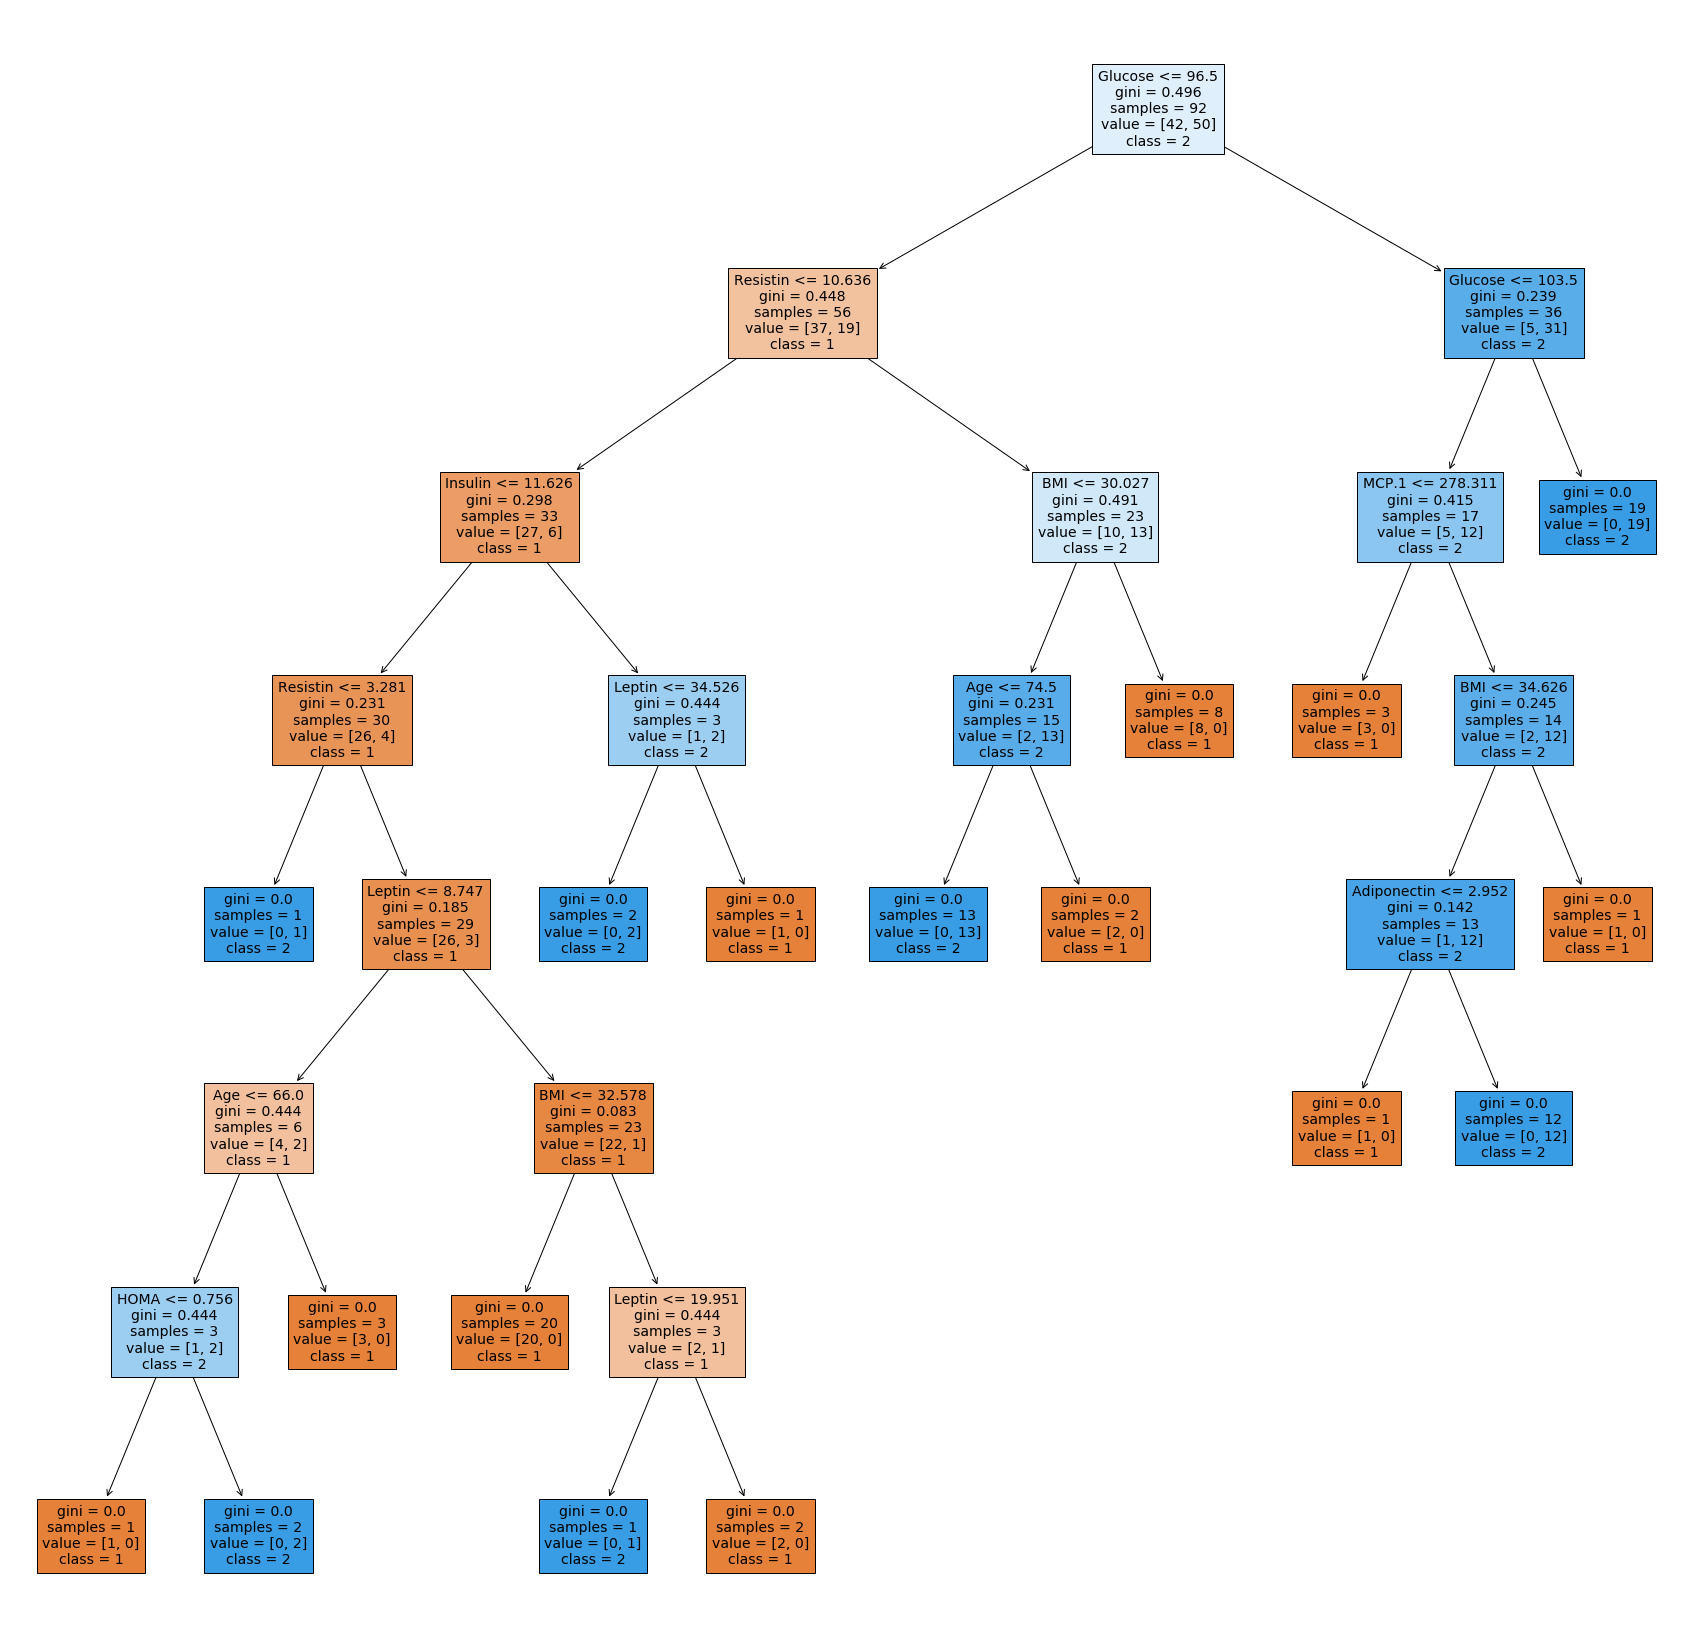

In [9]:
plt.figure(figsize=(30,30))
plot_tree(clt,feature_names=data.columns,class_names=['1','2'],filled=True)
plt.show()

In [10]:
y_pred = clt.predict(x_test)

In [11]:
accuracy_score(y_test,y_pred)

0.6666666666666666

In [12]:
confusion_matrix(y_test,y_pred)

array([[ 5,  5],
       [ 3, 11]], dtype=int64)

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.62      0.50      0.56        10
           2       0.69      0.79      0.73        14

    accuracy                           0.67        24
   macro avg       0.66      0.64      0.64        24
weighted avg       0.66      0.67      0.66        24

